<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/heatmap_lenght_identity_2023_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [1]:
! pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.6 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# db = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta')

bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_13_S00_matches.tsv', sep='\t', header=None)
bee_20 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_20_S00_matches.tsv', sep='\t', header=None)
bee_25 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_25_S00_matches.tsv', sep='\t', header=None)
bee_33 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_33_S00_matches.tsv', sep='\t', header=None)
bee_41 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_41_S00_matches.tsv', sep='\t', header=None)
bee_4 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_4_S00_matches.tsv', sep='\t', header=None)
bee_66 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_66_S00_matches.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/cyp450_01_10_2023/bee_75_S00_matches.tsv', sep='\t', header=None)

In [4]:
bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [5]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/P450_db_12062018.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  lantibiotics_id_list.append(seq.id)

name = 'CYP450'

table_data = {f'{name}': [ str(i) for i in lantibiotics_id_list]}

In [6]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  # pos = len(df.columns) - 1
  # df.drop(columns=df.columns[pos], inplace=True)
  return df

def sort_by_mulipl(df):
  df['prod'] = df['bee_13']* df['bee_20']*df['bee_25']*df['bee_33']*df['bee_41']*df['bee_4']*df['bee_66']*df['bee_75']
  df.sort_values(by='prod', ascending=False, inplace=True)

  # pos = len(df.columns) - 1
  # df.drop(columns=df.columns[pos], inplace=True)
  return df

def make_plot(df):
  l = len(df.columns) - 1
  num_rows, num_cols = df.iloc[:10, :l].shape
  fig_width = max(10, num_cols * 2)
  fig_height = max(l, num_rows * 0.5)

  f, ax = plt.subplots(figsize=(fig_width, fig_height))
  sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

  plt.show()

<ipython-input-6-073a25446643>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-6-073a25446643>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-6-073a25446643>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-i

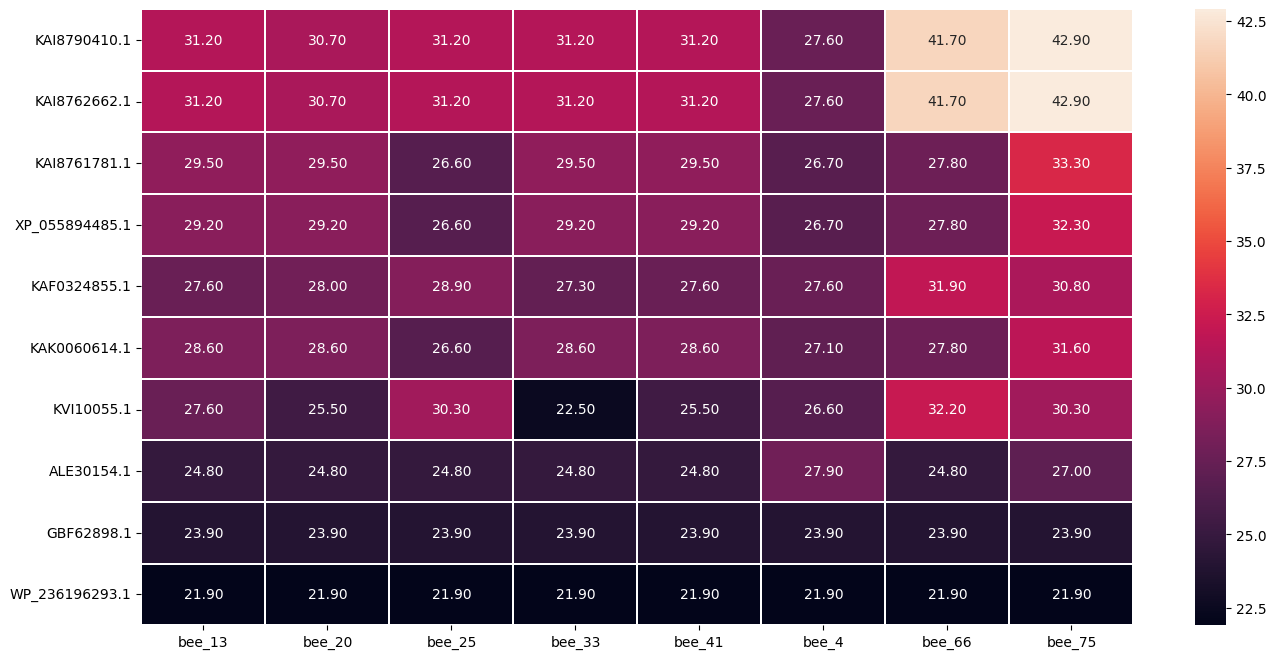

In [7]:
# !!! сделать декоратор !!!

df1 = sort_by_mulipl(make_df_for_heatmap(bees_var, bees_names, table_data, name))
make_plot(df1)

In [8]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :4].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 3]].set_index(1).rename(columns={3: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  pos = len(df.columns) - 1
  df.drop(columns=df.columns[pos], inplace=True)
  return df

def sort_by_mulipl(df):
  df['prod'] = df['bee_13']* df['bee_20']*df['bee_25']*df['bee_33']*df['bee_41']*df['bee_4']*df['bee_66']*df['bee_75']
  df.sort_values(by='prod', ascending=False, inplace=True)

  pos = len(df.columns) - 1
  df.drop(columns=df.columns[pos], inplace=True)
  return df

# def make_plot(df):
#   l = len(df.columns)
#   num_rows, num_cols = df.iloc[:10, :l].shape
#   fig_width = max(10, num_cols * 2)
#   fig_height = max(l, num_rows * 0.5)

#   f, ax = plt.subplots(figsize=(fig_width, fig_height))
#   sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

#   plt.show()

In [9]:
df1.columns

Index(['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66',
       'bee_75', 'prod'],
      dtype='object')

In [10]:
df_lens = sort_by_mulipl(make_df_for_heatmap(bees_var, bees_names, table_data, name))
# make_plot(df_lens)

<ipython-input-8-31dba0929170>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-8-31dba0929170>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-8-31dba0929170>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-i

In [11]:
df1.describe(

)

,bee_13,bee_20,bee_25,bee_33,bee_41,bee_4,bee_66,bee_75,prod
count,1236.000000,1236.000000,1236.00000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,46.483576,28.486570,4.53568,51.857362,47.496278,3.546521,16.522735,2.831472,4.563942e+09
std,33.676642,34.871719,14.40424,31.329619,32.259581,12.923211,29.573853,13.657525,6.432093e+10
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,21.900000,0.000000,0.00000,26.000000,24.075000,0.000000,0.000000,0.000000,0.000000e+00
50%,50.500000,0.000000,0.00000,57.050000,49.350000,0.000000,0.000000,0.000000,0.000000e+00
75%,75.150000,57.750000,0.00000,78.725000,72.700000,0.000000,25.150000,0.000000,0.000000e+00
max,100.000000,100.000000,100.00000,100.000000,100.000000,99.800000,100.000000,100.000000,1.436346e+12


In [12]:
cyp_indeces_sorted = pd.DataFrame(df1.index).set_index(0)


In [13]:
df_lens['prod'] = df1['prod']
df_lens.sort_values(by='prod', ascending=False, inplace=True)

In [14]:
df_lens

,bee_13,bee_20,bee_25,bee_33,bee_41,bee_4,bee_66,bee_75,prod
KAI8790410.1,346.0,313.0,346.0,346.0,346.0,293.0,355.0,366.0,1.436346e+12
KAI8762662.1,346.0,313.0,346.0,346.0,346.0,293.0,355.0,366.0,1.436346e+12
KAI8761781.1,644.0,644.0,312.0,644.0,644.0,288.0,281.0,345.0,4.979319e+11
XP_055894485.1,671.0,671.0,312.0,671.0,671.0,288.0,281.0,319.0,4.636301e+11
KAF0324855.1,308.0,322.0,308.0,308.0,308.0,308.0,251.0,250.0,4.563386e+11
...,...,...,...,...,...,...,...,...,...
XP_397170.4,372.0,413.0,0.0,384.0,0.0,0.0,0.0,0.0,0.000000e+00
XP_623362.3,498.0,498.0,0.0,498.0,356.0,498.0,498.0,0.0,0.000000e+00
XP_623595.1,501.0,0.0,0.0,467.0,406.0,0.0,0.0,0.0,0.000000e+00
XP_623621.1,343.0,314.0,0.0,323.0,0.0,0.0,0.0,0.0,0.000000e+00


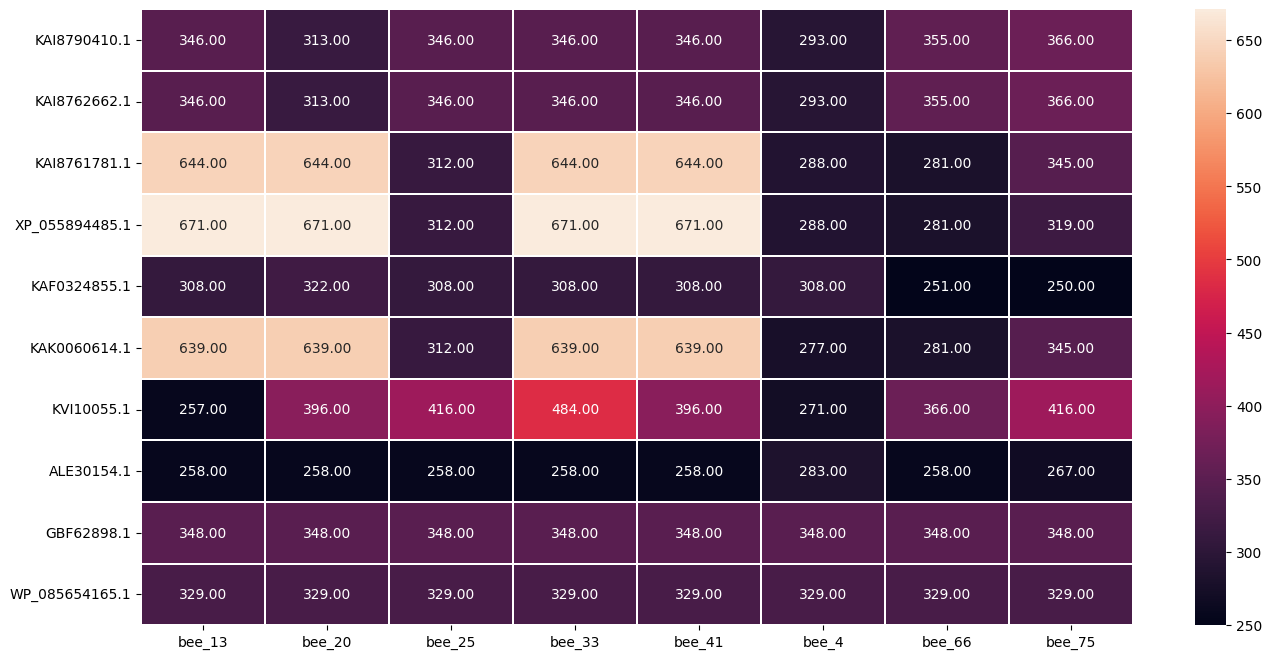

In [15]:
make_plot(df_lens)

<Axes: >

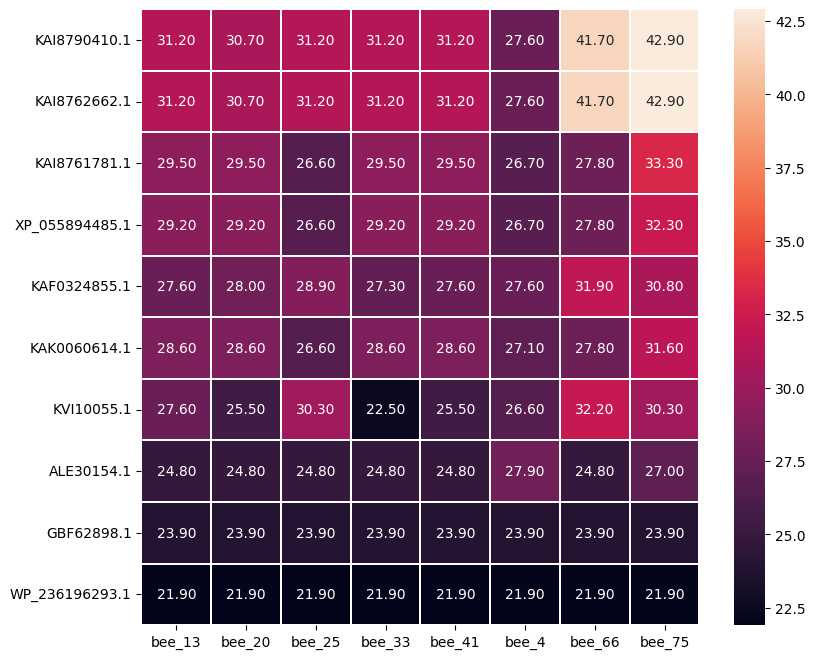

In [16]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df1.iloc[:10, :8], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

<Axes: >

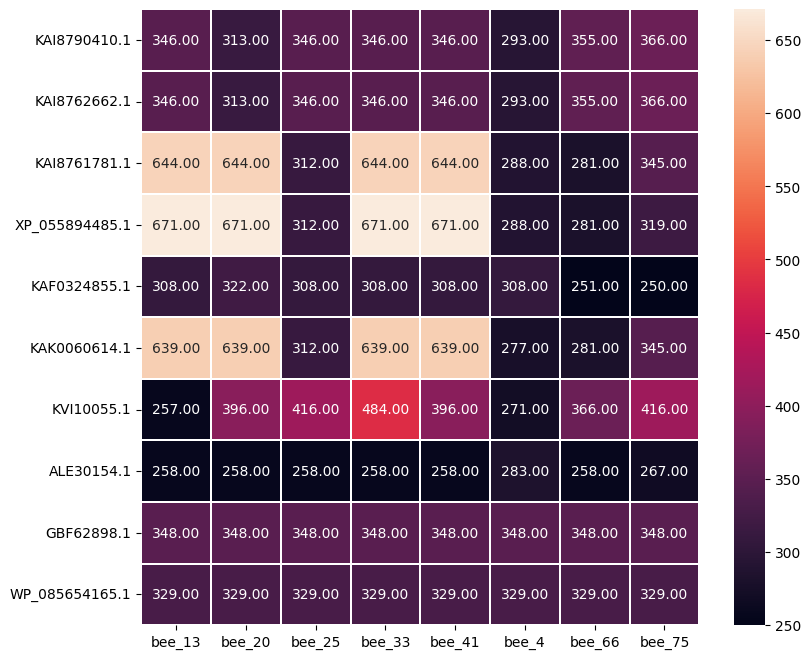

In [17]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df_lens.iloc[:10, :8], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")